In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Exploring
 

In [11]:
##loading the datasets using pandas
true_df = pd.read_csv("True.csv")

In [12]:
fake_df = pd.read_csv("Fake.csv")

In [13]:
##showing 1st 5 rows of dataset
true_df.head(5)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
true_df.sample(10)

,title,text,subject,date
13793,Australian police cut chains from immigration ...,SYDNEY (Reuters) - Australian police on Monday...,worldnews,"November 27, 2017"
4923,Tillerson says State Department spending 'simp...,TOKYO (Reuters) - U.S. Secretary of State Rex ...,politicsNews,"March 16, 2017"
4253,Connecticut Governor Malloy says he will not s...,(Reuters) - Connecticut Governor Dannel Malloy...,politicsNews,"April 13, 2017"
8754,"Senators urge U.S. to close lead testing gaps,...",(Reuters) - Some influential U.S. senators are...,politicsNews,"July 14, 2016"
7784,Vietnam gives thumbs-up to U.S. regional role ...,HANOI (Reuters) - Vietnam supports U.S. “inter...,politicsNews,"October 18, 2016"
6116,Trump has resigned from Trump Organization: Wh...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"January 23, 2017"
13469,Kremlin says U.S. idea to cut all ties with N....,MOSCOW (Reuters) - The Kremlin said on Thursda...,worldnews,"November 30, 2017"
7968,Majority of Americans say Clinton won first de...,NEW YORK (Reuters) - A majority of Americans ...,politicsNews,"September 28, 2016"
13363,"Hungary PM Orban, U.S. financier Soros clash a...",BUDAPEST (Reuters) - Hungarian Prime Minister ...,worldnews,"December 1, 2017"
510,Congressman Gutierrez will not seek re-electio...,WASHINGTON (Reuters) - Democratic U.S. Represe...,politicsNews,"November 28, 2017"


In [15]:
true_df['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [16]:
true_df.shape

(21417, 4)

In [17]:
fake_df.shape

(23481, 4)

it's clearly that much imbalanced data , so we can work with it.

In [18]:
# Add a label column to each dataframe
true_df['label'] = 'real'
fake_df['label'] = 'fake'

# Combine the datasets
df = pd.concat([true_df, fake_df], ignore_index=True)


In [19]:
df.sample(5)

,title,text,subject,date,label
3283,Trump says Comey testimony showed 'no obstruct...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 9, 2017",real
10869,Puerto Rico senate approves bill to restructur...,(Reuters) - The Puerto Rico senate has approve...,politicsNews,"February 11, 2016",real
37037,BREAKING: WATCH LIVE FEED FROM “Freedom Of Spe...,Pretty much people just yelling at each other ...,politics,"May 30, 2015",fake
21059,Libyan forces attack Islamic State near former...,"BENGHAZI, Libya (Reuters) - East Libyan forces...",worldnews,"September 4, 2017",real
10887,Republican Christie assesses future of White H...,WASHINGTON (Reuters) - Republican Chris Christ...,politicsNews,"February 9, 2016",real


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [21]:
df.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


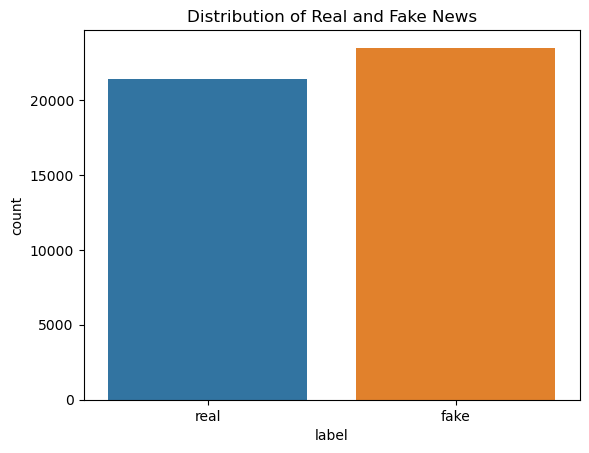

In [22]:
# Display the distribution of the labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Real and Fake News')
plt.show()


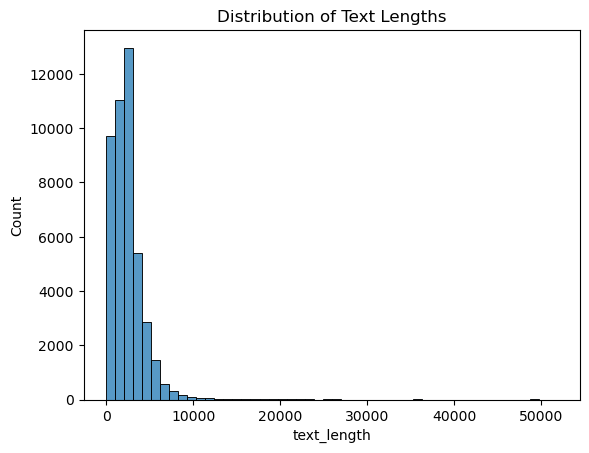

In [23]:
# Display the length of text in the dataset
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()


C:\Users\SOHINI\AppData\Local\Temp\ipykernel_35684\741705356.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 'real']['text_length'], color='blue', label='Real News', shade=True)
C:\Users\SOHINI\AppData\Local\Temp\ipykernel_35684\741705356.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 'fake']['text_length'], color='red', label='Fake News', shade=True)


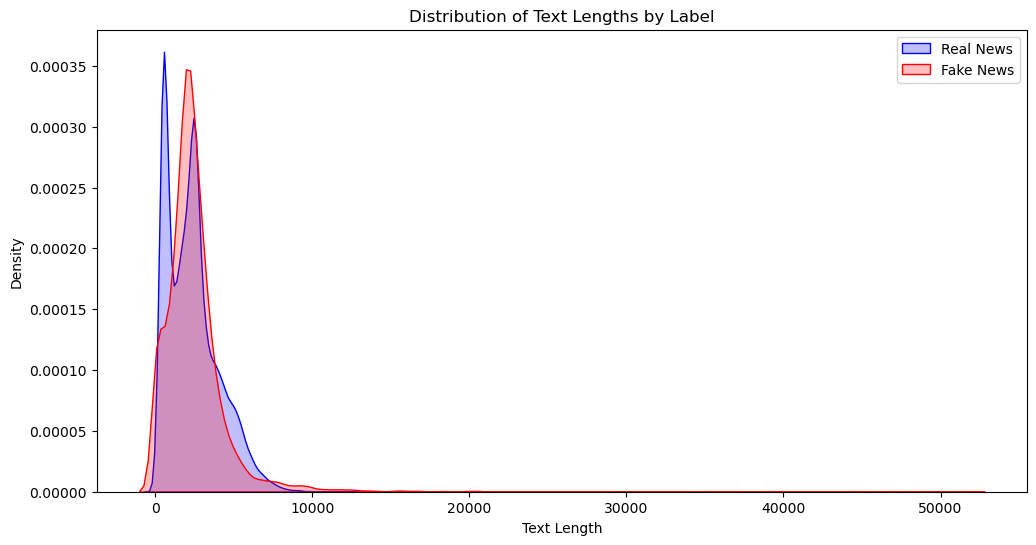

In [24]:
# KDE plot for the distribution of text length per label
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['label'] == 'real']['text_length'], color='blue', label='Real News', shade=True)
sns.kdeplot(df[df['label'] == 'fake']['text_length'], color='red', label='Fake News', shade=True)
plt.title('Distribution of Text Lengths by Label')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.show()

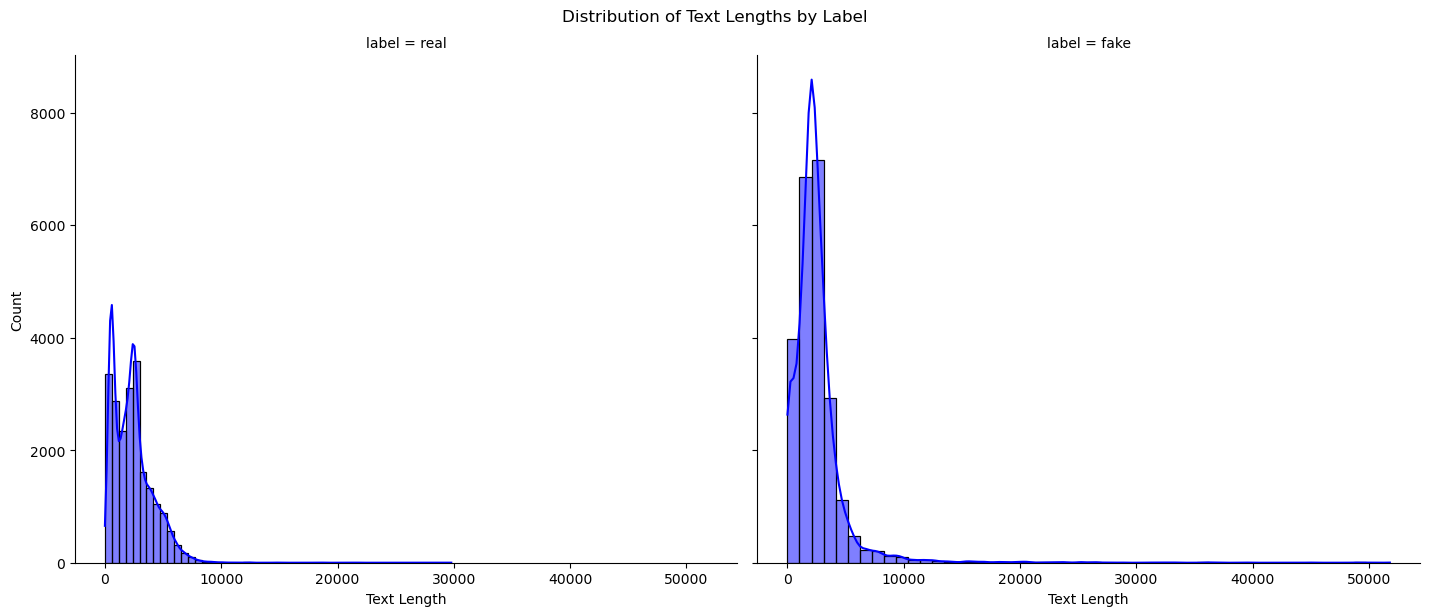

In [25]:
# FacetGrid plot for the distribution of text length per label
g = sns.FacetGrid(df, col="label", height=6, aspect=1.2)
g.map(sns.histplot, 'text_length', bins=50, kde=True, color='blue')
g.fig.suptitle('Distribution of Text Lengths by Label', y=1.02)
g.set_axis_labels('Text Length', 'Count')
plt.show()

In [26]:
# Check the most common words in fake and real news
from wordcloud import WordCloud

# Generate word clouds for fake and real news
fake_news = ' '.join(df[df['label'] == 'fake']['text'])
real_news = ' '.join(df[df['label'] == 'real']['text'])

In [27]:
fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(fake_news)
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_news)

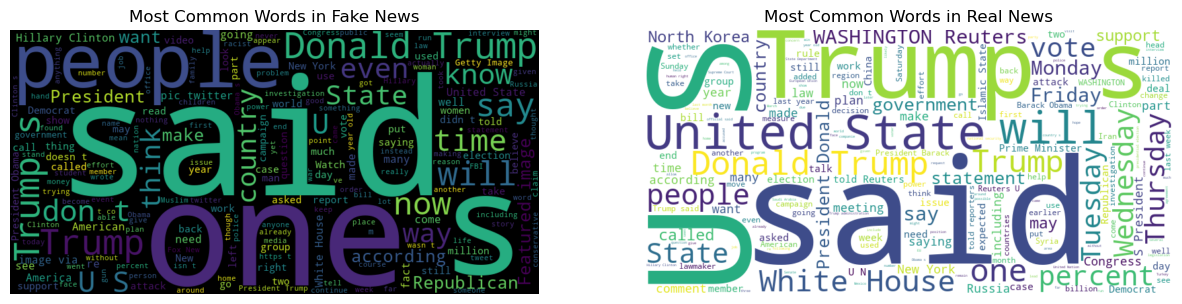

In [18]:
# Plot the word clouds
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Fake News')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Real News')

plt.show()

### Data Preprocessing

In [28]:
df.isnull().sum()

title          0
text           0
subject        0
date           0
label          0
text_length    0
dtype: int64

In [29]:
# Data Cleaning
import re

def clean_text(text):
    # Remove unnecessary whitespace
    text = text.strip()
    # Remove newline characters
    text = text.replace('\n', ' ')
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove any non-alphanumeric characters (except spaces)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text

In [30]:
# Apply the clean_text function to the text column
df['text'] = df['text'].apply(clean_text)

# Display a sample of the cleaned text
print(df['text'].head())


0    WASHINGTON Reuters  The head of a conservative...
1    WASHINGTON Reuters  Transgender people will be...
2    WASHINGTON Reuters  The special counsel invest...
3    WASHINGTON Reuters  Trump campaign adviser Geo...
4    SEATTLEWASHINGTON Reuters  President Donald Tr...
Name: text, dtype: object


In [31]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()


In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SOHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SOHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)


In [35]:
# Display a sample of the preprocessed text
print(df['text'].head())


0    washington reuter head conserv republican fact...
1    washington reuter transgend peopl allow first ...
2    washington reuter special counsel investig lin...
3    washington reuter trump campaign advis georg p...
4    seattlewashington reuter presid donald trump c...
Name: text, dtype: object


In [36]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X = tfidf_vectorizer.fit_transform(df['text'])


In [37]:
# Encode the labels to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])


In [38]:
# Display the shape of the TF-IDF matrix and the labels
print(X.shape)
print(y.shape)

(44898, 5000)
(44898,)


### Model Training


In [39]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (35918, 5000)
Testing set size: (8980, 5000)


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Define hyperparameters for each model
param_grid = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [4, 6, 8, 10],
        'criterion': ['gini', 'entropy']
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [4, 6, 8, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Train the models and perform hyperparameter tuning with GridSearchCV
best_models = {}
for model_name in models:
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grid[model_name], 
                               cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Training Logistic Regression...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Training Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Training Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [43]:
best_models

{'Logistic Regression': LogisticRegression(C=10, solver='liblinear'),
 'Random Forest': RandomForestClassifier(max_depth=10),
 'Decision Tree': DecisionTreeClassifier(max_depth=8, min_samples_leaf=2)}

In [47]:
Model = GradientBoostingClassifier()


# Train the model
Model.fit(X_train, y_train)
best_models['Gradient Boosting'] = Model
##since it taking too much time to hyperparameter tuning of gradient boosting classifier ,it's seem not feasible to hyper parameter tune in this machine

### Model Evaluation


Evaluating Logistic Regression...
Classification report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9934298440979955
Precision: 0.9921640931090113
Recall: 0.9942263279445728
F1 Score: 0.9931941400392202
ROC AUC Score: 0.9995131739054857



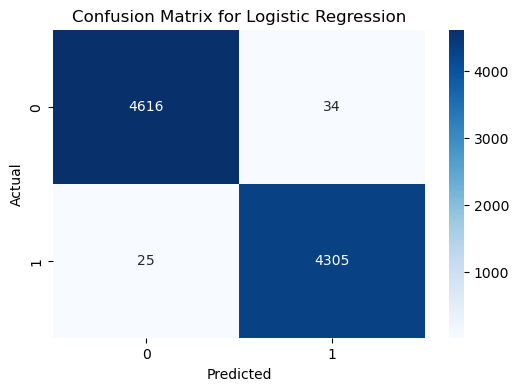

Evaluating Random Forest...
Classification report for Random Forest:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9878619153674832
Precision: 0.9859544093944278
Recall: 0.9889145496535797
F1 Score: 0.9874322610400093
ROC AUC Score: 0.9985378330725868



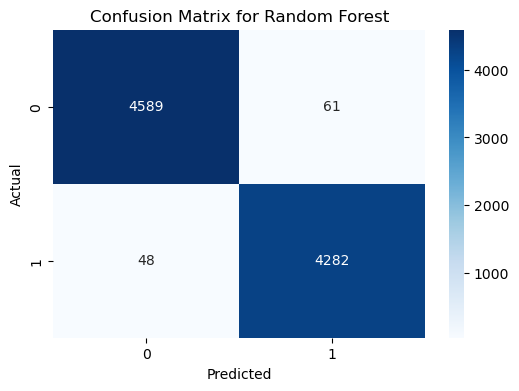

Evaluating Decision Tree...
Classification report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4650
           1       0.99      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy: 0.9953229398663697
Precision: 0.9940092165898617
Recall: 0.9963048498845266
F1 Score: 0.9951557093425606
ROC AUC Score: 0.9952950408502819



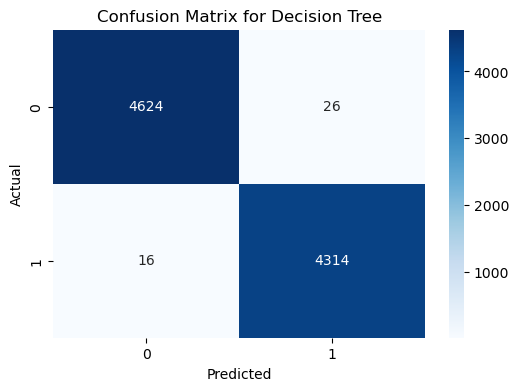

Evaluating Gradient Boosting...
Classification report for Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4650
           1       0.99      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy: 0.9952115812917595
Precision: 0.9933256616800921
Recall: 0.9967667436489608
F1 Score: 0.9950432276657062
ROC AUC Score: 0.9984765948993022



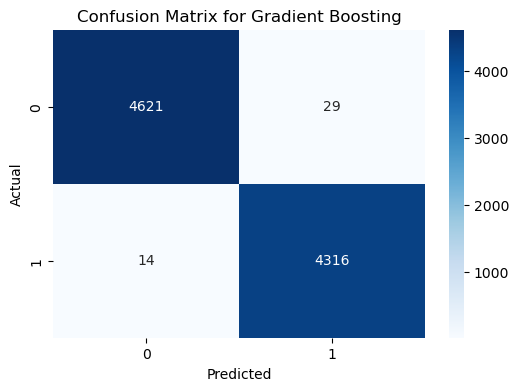

In [50]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Evaluate the best models
for model_name in best_models:
    print(f"Evaluating {model_name}...")
    y_pred = best_models[model_name].predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, best_models[model_name].predict_proba(X_test)[:,1])
    
    print(f"Classification report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}\n")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [51]:
# Compare the performance of all models
results = []
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, best_models[model_name].predict_proba(X_test)[:,1])
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    })


In [52]:
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0  Logistic Regression  0.993430   0.992164  0.994226  0.993194       0.999513
1        Random Forest  0.987862   0.985954  0.988915  0.987432       0.998538
2        Decision Tree  0.995323   0.994009  0.996305  0.995156       0.995295
3    Gradient Boosting  0.995212   0.993326  0.996767  0.995043       0.998477
